# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Reading Files

In [2]:
score_report_match1 = pd.read_csv(r'C:\Users\SOOSAN SHABNAM\OneDrive\Desktop\quiswe\score_report\match1_score_report.csv')
match1_traindata = pd.read_csv(r'C:\Users\SOOSAN SHABNAM\OneDrive\Desktop\quiswe\training\match1.csv')

score_report_match2 = pd.read_csv(r'C:\Users\SOOSAN SHABNAM\OneDrive\Desktop\quiswe\score_report\match2_score_report.csv')
match2_traindata = pd.read_csv(r'C:\Users\SOOSAN SHABNAM\OneDrive\Desktop\quiswe\training\match2.csv')

c:\users\soosan shabnam\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\users\soosan shabnam\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (12,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\users\soosan shabnam\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (12,13,14,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Display Data

In [3]:
score_report_match = pd.concat([score_report_match1, score_report_match2], axis = 0)

In [4]:
score_report_match.head(20000)

,Unnamed: 0,_id,Innings,Over,Ball,Runs,WagonX,WagonY,Wkt?,Bat_LH/RH,Shot1,Shot2,Hgt,LandX,LandY,Bowl_LH/RH,T/Ov,6D,Shot_type,Spin_text
0,0,29/10/2021 13:58:35:850826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,29/10/2021 13:58:35:892468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,29/10/2021 13:58:35:928792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,29/10/2021 13:58:35:965873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,29/10/2021 13:58:36:007398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,29/10/2021 14:13:06:515842,1.0,3.0,1.0,0.0,0.0,0.0,N,R,P,D,0.0,0.0,0.0,L,0,NaN,DEFEND,NaN
19996,19996,29/10/2021 14:13:06:541551,1.0,3.0,1.0,0.0,0.0,0.0,N,R,P,D,0.0,0.0,0.0,L,0,NaN,DEFEND,NaN
19997,19997,29/10/2021 14:13:06:581200,1.0,3.0,1.0,0.0,0.0,0.0,N,R,P,D,0.0,0.0,0.0,L,0,NaN,DEFEND,NaN
19998,19998,29/10/2021 14:13:06:628689,1.0,3.0,1.0,0.0,0.0,0.0,N,R,P,D,0.0,0.0,0.0,L,0,NaN,DEFEND,NaN


In [5]:
match_traindata = pd.concat([match1_traindata, match2_traindata], axis = 0)

In [6]:
match_traindata.head()

,uid,time,players,frame_count,livelock,overs,onstrike_batsman,offstrike_batsman,flip,pos,over,ball,highlight,player_connect,distance,boundary_distance,gap_data
0,0,29/10/2021 13:58:35:850826,"{'23': {'identities': 23, 'bbox': [1037, 1609,...",23471,False,18.3,NaN,NaN,0,True,-1,-1,-1,-1,-1,-1,-1
1,1,29/10/2021 13:58:35:892468,"{'23': {'identities': 23, 'bbox': [1038, 1610,...",23472,False,18.3,NaN,NaN,0,True,-1,-1,-1,-1,-1,-1,-1
2,2,29/10/2021 13:58:35:928792,"{'23': {'identities': 23, 'bbox': [1038, 1610,...",23473,False,18.3,NaN,NaN,0,True,-1,-1,-1,-1,-1,-1,-1
3,3,29/10/2021 13:58:35:965873,"{'23': {'identities': 23, 'bbox': [1038, 1610,...",23474,False,18.3,NaN,NaN,0,True,-1,-1,-1,-1,-1,-1,-1
4,4,29/10/2021 13:58:36:007398,"{'23': {'identities': 23, 'bbox': [1038, 1609,...",23475,False,18.3,NaN,NaN,0,True,-1,-1,-1,-1,-1,-1,-1


# Data Info

In [7]:
score_report_match.describe()

,Unnamed: 0,Innings,Over,Ball,Runs,WagonX,WagonY,Hgt,LandX,LandY,6D,Spin_text
count,611028.000000,413111.000000,413111.000000,413111.000000,413111.000000,413111.000000,413111.000000,413111.000000,413111.000000,413111.000000,30478.000000,0.0
mean,152757.716056,1.541428,10.757910,4.075360,1.424566,16.289438,13.206654,0.600618,5.855828,4.842314,66.903996,NaN
std,88196.473477,0.498281,5.885374,1.953185,1.852711,25.963726,19.882370,1.426648,18.160405,16.550199,28.838341,NaN
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,76378.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.000000,NaN
50%,152756.500000,2.000000,11.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,74.000000,NaN
75%,229135.000000,2.000000,16.000000,6.000000,2.000000,28.000000,25.000000,0.000000,0.000000,0.000000,82.000000,NaN
max,306375.000000,2.000000,20.000000,9.000000,6.000000,88.000000,82.000000,5.000000,88.000000,83.000000,94.000000,NaN


In [8]:
score_report_match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 611028 entries, 0 to 304651
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  611028 non-null  int64  
 1   _id         611028 non-null  object 
 2   Innings     413111 non-null  float64
 3   Over        413111 non-null  float64
 4   Ball        413111 non-null  float64
 5   Runs        413111 non-null  float64
 6   WagonX      413111 non-null  float64
 7   WagonY      413111 non-null  float64
 8   Wkt?        413111 non-null  object 
 9   Bat_LH/RH   413111 non-null  object 
 10  Shot1       413111 non-null  object 
 11  Shot2       413111 non-null  object 
 12  Hgt         413111 non-null  float64
 13  LandX       413111 non-null  float64
 14  LandY       413111 non-null  float64
 15  Bowl_LH/RH  413111 non-null  object 
 16  T/Ov        413105 non-null  object 
 17  6D          30478 non-null   float64
 18  Shot_type   363042 non-null  object 
 19  Sp

In [9]:
score_report_match.count()

Unnamed: 0    611028
_id           611028
Innings       413111
Over          413111
Ball          413111
Runs          413111
WagonX        413111
WagonY        413111
Wkt?          413111
Bat_LH/RH     413111
Shot1         413111
Shot2         413111
Hgt           413111
LandX         413111
LandY         413111
Bowl_LH/RH    413111
T/Ov          413105
6D             30478
Shot_type     363042
Spin_text          0
dtype: int64

In [10]:
match_traindata.describe()

,uid,frame_count,overs,onstrike_batsman,offstrike_batsman,flip,over,ball
count,611150.000000,611150.000000,6.111500e+05,0.0,0.0,611150.000000,611150.0,611150.0
mean,152788.176641,137420.278233,1.830000e+01,NaN,NaN,0.507013,-1.0,-1.0
std,88214.014394,100345.358956,2.486902e-14,NaN,NaN,0.499951,0.0,0.0
min,0.000000,103.000000,1.830000e+01,NaN,NaN,0.000000,-1.0,-1.0
25%,76393.250000,57757.250000,1.830000e+01,NaN,NaN,0.000000,-1.0,-1.0
50%,152787.000000,109147.500000,1.830000e+01,NaN,NaN,1.000000,-1.0,-1.0
75%,229180.750000,205822.750000,1.830000e+01,NaN,NaN,1.000000,-1.0,-1.0
max,306422.000000,363639.000000,1.830000e+01,NaN,NaN,1.000000,-1.0,-1.0


In [11]:
match_traindata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 611150 entries, 0 to 304726
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   uid                611150 non-null  int64  
 1   time               611150 non-null  object 
 2   players            611150 non-null  object 
 3   frame_count        611150 non-null  int64  
 4   livelock           611150 non-null  bool   
 5   overs              611150 non-null  float64
 6   onstrike_batsman   0 non-null       float64
 7   offstrike_batsman  0 non-null       float64
 8   flip               611150 non-null  int64  
 9   pos                611150 non-null  bool   
 10  over               611150 non-null  int64  
 11  ball               611150 non-null  int64  
 12  highlight          611150 non-null  object 
 13  player_connect     611150 non-null  object 
 14  distance           611150 non-null  object 
 15  boundary_distance  611150 non-null  object 
 16  ga

In [12]:
match_traindata.count()

uid                  611150
time                 611150
players              611150
frame_count          611150
livelock             611150
overs                611150
onstrike_batsman          0
offstrike_batsman         0
flip                 611150
pos                  611150
over                 611150
ball                 611150
highlight            611150
player_connect       611150
distance             611150
boundary_distance    611150
gap_data             611150
dtype: int64

# Cleaning Data

In [13]:
def clean(df, *features):
    for feature in features:
        df = df.drop([feature], axis = 1)
    return df

In [14]:
score_report_match = clean(score_report_match, 'Spin_text', 'Unnamed: 0')

In [15]:
score_report_match = score_report_match.dropna()

In [16]:
match_traindata = clean(match_traindata, 'onstrike_batsman', 'offstrike_batsman', 'over', 'ball', 'highlight', 'player_connect', 'distance', 'boundary_distance', 'gap_data')

# Data After Cleaning

In [17]:
score_report_match.head()

,_id,Innings,Over,Ball,Runs,WagonX,WagonY,Wkt?,Bat_LH/RH,Shot1,Shot2,Hgt,LandX,LandY,Bowl_LH/RH,T/Ov,6D,Shot_type
30660,29/10/2021 14:20:13:156633,1.0,4.0,1.0,6.0,0.0,0.0,N,R,P,A,5.0,88.0,54.0,L,6,78.0,SLOG
30661,29/10/2021 14:20:13:197061,1.0,4.0,1.0,6.0,0.0,0.0,N,R,P,A,5.0,88.0,54.0,L,6,78.0,SLOG
30662,29/10/2021 14:20:13:233695,1.0,4.0,1.0,6.0,0.0,0.0,N,R,P,A,5.0,88.0,54.0,L,6,78.0,SLOG
30663,29/10/2021 14:20:13:274747,1.0,4.0,1.0,6.0,0.0,0.0,N,R,P,A,5.0,88.0,54.0,L,6,78.0,SLOG
30664,29/10/2021 14:20:13:395279,1.0,4.0,1.0,6.0,0.0,0.0,N,R,P,A,5.0,88.0,54.0,L,6,78.0,SLOG


In [18]:
score_report_match.describe()

,Innings,Over,Ball,Runs,WagonX,WagonY,Hgt,LandX,LandY,6D
count,25198.000000,25198.000000,25198.000000,25198.0,25198.0,25198.0,25198.0,25198.00000,25198.000000,25198.000000
mean,1.669855,13.919240,3.960830,6.0,0.0,0.0,5.0,46.29296,45.550321,78.462656
std,0.470275,5.711345,2.257911,0.0,0.0,0.0,0.0,32.73041,29.448358,8.452990
min,1.000000,3.000000,1.000000,6.0,0.0,0.0,5.0,0.00000,0.000000,62.000000
25%,1.000000,9.000000,2.000000,6.0,0.0,0.0,5.0,6.00000,22.000000,71.000000
50%,2.000000,17.000000,4.000000,6.0,0.0,0.0,5.0,47.00000,54.000000,81.000000
75%,2.000000,19.000000,6.000000,6.0,0.0,0.0,5.0,84.00000,71.000000,83.000000
max,2.000000,19.000000,7.000000,6.0,0.0,0.0,5.0,88.00000,83.000000,94.000000


In [19]:
score_report_match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25198 entries, 30660 to 270828
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   _id         25198 non-null  object 
 1   Innings     25198 non-null  float64
 2   Over        25198 non-null  float64
 3   Ball        25198 non-null  float64
 4   Runs        25198 non-null  float64
 5   WagonX      25198 non-null  float64
 6   WagonY      25198 non-null  float64
 7   Wkt?        25198 non-null  object 
 8   Bat_LH/RH   25198 non-null  object 
 9   Shot1       25198 non-null  object 
 10  Shot2       25198 non-null  object 
 11  Hgt         25198 non-null  float64
 12  LandX       25198 non-null  float64
 13  LandY       25198 non-null  float64
 14  Bowl_LH/RH  25198 non-null  object 
 15  T/Ov        25198 non-null  object 
 16  6D          25198 non-null  float64
 17  Shot_type   25198 non-null  object 
dtypes: float64(10), object(8)
memory usage: 3.7+ MB


In [20]:
score_report_match.count()

_id           25198
Innings       25198
Over          25198
Ball          25198
Runs          25198
WagonX        25198
WagonY        25198
Wkt?          25198
Bat_LH/RH     25198
Shot1         25198
Shot2         25198
Hgt           25198
LandX         25198
LandY         25198
Bowl_LH/RH    25198
T/Ov          25198
6D            25198
Shot_type     25198
dtype: int64

In [21]:
match_traindata.head()

,uid,time,players,frame_count,livelock,overs,flip,pos
0,0,29/10/2021 13:58:35:850826,"{'23': {'identities': 23, 'bbox': [1037, 1609,...",23471,False,18.3,0,True
1,1,29/10/2021 13:58:35:892468,"{'23': {'identities': 23, 'bbox': [1038, 1610,...",23472,False,18.3,0,True
2,2,29/10/2021 13:58:35:928792,"{'23': {'identities': 23, 'bbox': [1038, 1610,...",23473,False,18.3,0,True
3,3,29/10/2021 13:58:35:965873,"{'23': {'identities': 23, 'bbox': [1038, 1610,...",23474,False,18.3,0,True
4,4,29/10/2021 13:58:36:007398,"{'23': {'identities': 23, 'bbox': [1038, 1609,...",23475,False,18.3,0,True


In [22]:
match_traindata.describe()

,uid,frame_count,overs,flip
count,611150.000000,611150.000000,6.111500e+05,611150.000000
mean,152788.176641,137420.278233,1.830000e+01,0.507013
std,88214.014394,100345.358956,2.486902e-14,0.499951
min,0.000000,103.000000,1.830000e+01,0.000000
25%,76393.250000,57757.250000,1.830000e+01,0.000000
50%,152787.000000,109147.500000,1.830000e+01,1.000000
75%,229180.750000,205822.750000,1.830000e+01,1.000000
max,306422.000000,363639.000000,1.830000e+01,1.000000


In [23]:
match_traindata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 611150 entries, 0 to 304726
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   uid          611150 non-null  int64  
 1   time         611150 non-null  object 
 2   players      611150 non-null  object 
 3   frame_count  611150 non-null  int64  
 4   livelock     611150 non-null  bool   
 5   overs        611150 non-null  float64
 6   flip         611150 non-null  int64  
 7   pos          611150 non-null  bool   
dtypes: bool(2), float64(1), int64(3), object(2)
memory usage: 33.8+ MB


In [24]:
match_traindata.count()

uid            611150
time           611150
players        611150
frame_count    611150
livelock       611150
overs          611150
flip           611150
pos            611150
dtype: int64

# Data Visualization

In [25]:
df1 = match_traindata.drop(['time', 'players', 'livelock', 'pos'], axis = 1)

<AxesSubplot:>

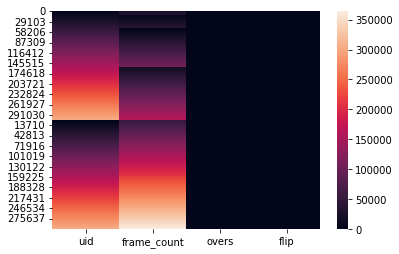

In [26]:
sns.heatmap(df1)

# Data Split

In [27]:
X = match_traindata.iloc[:, 4:]
y = match_traindata.iloc[:, 0]

X_train, y_train, X_test, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Training Model

In [28]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [488920, 122230]